C:\Users\charl\AppData\Local\Temp\ipykernel_15192\4065765976.py:31: RuntimeWarning: divide by zero encountered in divide
  drag_induced_parasitic = CDp * dynamic_pressure * Sref + (required_lift**2 / (dynamic_pressure * np.pi * span**2 * oswald))


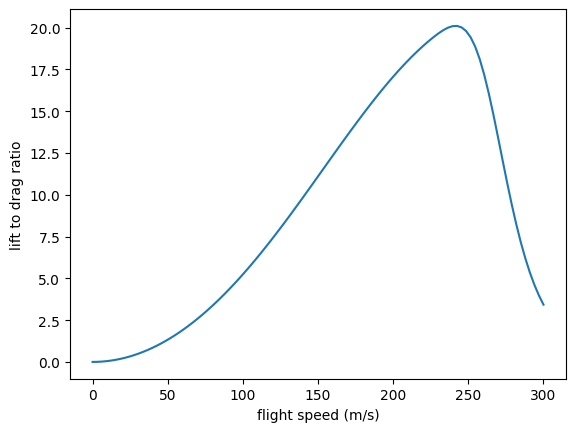

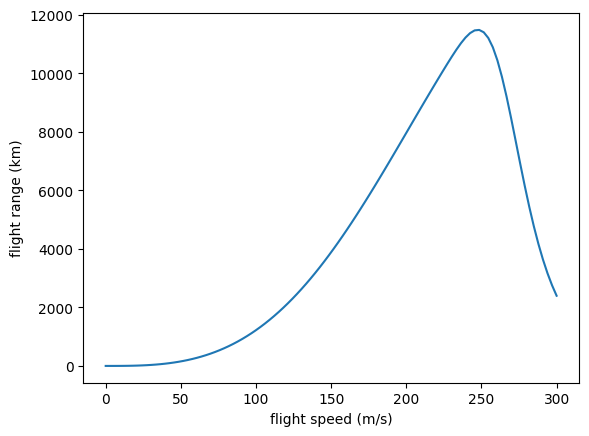

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

span = 50
Sref = 300
CDp = 0.01
oswald = 0.7
altitude = 10668 #meters
take_off_mass = 200000
fuel_burned = 60000
specific_fuel = 0.55 / (3600) #s^-1
Mcc = 0.75
g = 9.81

temperature = 218.808 #K
pressure = 23842.3 #K
density = 0.379597
speed_of_sound = 296.535
dynamic_viscosity = 0.0000144446

velocity = np.linspace(0,300,100)

required_lift = take_off_mass * g
dynamic_pressure = (1/2) * density * velocity**2
mach_number = velocity / speed_of_sound

drag_induced_parasitic = CDp * dynamic_pressure * Sref + (required_lift**2 / (dynamic_pressure * np.pi * span**2 * oswald))

CDc = 0 * mach_number
CDc[mach_number > Mcc] = 20 * (mach_number[mach_number > Mcc] - Mcc)**4
drag_compressible = CDc * dynamic_pressure * Sref

total_drag = drag_compressible + drag_induced_parasitic

range = (velocity / specific_fuel) * (required_lift / total_drag) * np.log((1 - fuel_burned/take_off_mass)**(-1))

plt.figure()
plt.plot(velocity,required_lift/total_drag)
plt.xlabel('flight speed (m/s)')
plt.ylabel('lift to drag ratio')
plt.show()

plt.figure()
plt.plot(velocity,range / 1000)
plt.xlabel('flight speed (m/s)')
plt.ylabel('flight range (km)')
plt.show()
